# <center> <font color="blue"> Regression Analysis of Logistic Freights

### Premise:
India is the world’s second-largest producer of cement. It accounts for more than 7% of the global installed capacity. Currently, India is producing 278 million tonnes of cement per annum. The industry is expected to reach 550-600 million tonnes per annum by 2025. The industry experts consider government programs such as Housing for all by 2022, Make in India, Creation of 100 Smart Cities, Swachh Bharat Abhiyan, and concrete road projects as the major factors behind the flourishing of India’s cement market. The Efficient Logistic Management is still a hurdle which the companies need to tackle in order to achieve this ambitious targets.
    
Freigh rates play an integral part in the final costing of Cement and every cement industry company wishes to control the freights inorder to improve their EBITDA Margins. The Road Logistic freight is controlled by multiple factors and multiple parties. The geo-political situation, the road network connectivity, the terrain conditions all play their part in determination of the freight.


### Business Goal:

This Cement Industry Giant wishes to employ ML Models to investigate:
- 1. How well the main measurement metric "PTPK" can be judged for a new business zone (which may be operational in future), if the given features are known by employing the ML model?
- 2. What are the factors which play main role in influencing PTPK?



#### Disclaimer: The data  for this project is purely hypothetical. Any resemblance is purely coincidental.

#### Importing necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.4f}'.format
pd.set_option('display.max_columns', 55)
pd.set_option('display.max_rows', 100)

#### Reading the data.

In [2]:
df = pd.read_csv("logistics.csv")

### <font color = "Orange"> Data Dictionary
**Region:** Region of Operation.

**Zone:** Operation zone

**State:** Geographical states of operation.

**Logistics Zone:** Logistic zones defined for ease of operation.

**Ship-To-Party Region:** The destination of sale.

**Distribution Channel:** Mode of distribution.

**Business Area:** The Plant used to serve the region.

**Delivery Qty.:** Quantity delivered in the shipment.

**Route Distance:** Distance between business area and ship-to-party region.

**Shipment Description:** Shipment type, primary or secondary.

**Wheeler No.:** The number of wheels in the truck used for the shipment.

**Truck Type Description:** The truck ownership definition, market, own or dedicated truck.

**PTPK:** The per ton per Km cost. This is also the dependent variable.

In [3]:
df.head()

,Region,Zone,State,Logistics Zone,Ship-To-Party Region,Distribution Channel,Business Area,Delivery Qty.,Route Distance,Shipment Description,Wheeler No.,Truck type Description,PTPK
0,NE,A,AS,LO1,AC,TR,G,9.5000,86,PDR,6W,Market Truck,9.5900
1,NE,A,AS,SIV,AC,TR,G,5.0000,303,PDR,12W,Market Truck,2.9700
2,NE,A,AS,SIV,AC,TR,G,10.0000,303,PDR,12W,Market Truck,2.9700
3,NE,A,AS,TEZ,AC,TR,G,40.0000,184,PDR,12W,Market Truck,3.6400
4,NE,A,AP,DHE,AD,TR,G,11.0000,84,SDR,6W,Market Truck,22.6200


In [4]:
df.shape

(8611, 13)

In [5]:
df.describe(percentiles=[.05,.10,.25,.50,.75,.90,.95,.99])

,Delivery Qty.,Route Distance,PTPK
count,8611.0000,8611.0000,8611.0000
mean,19.2231,194.8605,6.5249
std,10.4607,131.5480,6.1103
min,0.0500,1.0000,0.0000
5%,5.0000,24.0000,2.5800
10%,7.5000,41.0000,2.7400
25%,10.5000,83.0000,3.2900
50%,19.0000,161.0000,4.9800
75%,25.0000,293.0000,7.9200
90%,35.0000,378.0000,10.3000


In [6]:
df.dtypes

Region                     object
Zone                       object
State                      object
Logistics Zone             object
Ship-To-Party Region       object
Distribution Channel       object
Business Area              object
Delivery Qty.             float64
Route Distance              int64
Shipment Description       object
Wheeler No.                object
Truck type Description     object
PTPK                      float64
dtype: object

In [7]:
#checking null values
df.isnull().sum()

Region                    0
Zone                      0
State                     0
Logistics Zone            0
Ship-To-Party Region      0
Distribution Channel      0
Business Area             0
Delivery Qty.             0
Route Distance            0
Shipment Description      0
Wheeler No.               0
Truck type Description    0
PTPK                      0
dtype: int64

In [8]:
df=df.drop("Region", axis=1) #As region is same for all data points it can be dropped.

#### Let's remove the PTPK outliers first

In [9]:
low=df["PTPK"].quantile(0.05)
high=df["PTPK"].quantile(0.95)
df=df.loc[(df["PTPK"]>low) & (df["PTPK"]<high)]
df.describe(percentiles=[.05,.10,.25,.50,.75,.90,.95,.99])

,Delivery Qty.,Route Distance,PTPK
count,7712.0000,7712.0000,7712.0000
mean,19.3011,192.8291,5.7422
std,10.4010,119.4327,2.7080
min,0.0500,15.0000,2.5900
5%,5.0000,41.0000,2.7400
10%,7.5000,57.0000,2.8800
25%,10.5000,92.0000,3.3300
50%,20.0000,161.0000,5.0000
75%,25.0000,278.0000,7.6300
90%,35.0000,361.0000,10.1400


#### Visualising the distribution of PTPK.

<AxesSubplot:xlabel='PTPK', ylabel='Density'>

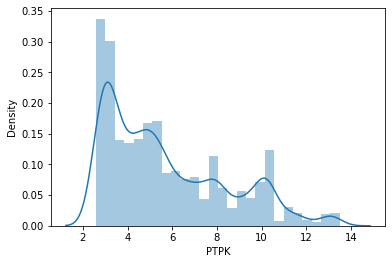

In [10]:
sns.distplot(df["PTPK"])

In [11]:
#Let's gather all object type columns
object_columns = []
for obj in df.columns:
    if df[obj].dtype == np.object:
        object_columns.append(obj)
print(object_columns)

['Zone', 'State', 'Logistics Zone', 'Ship-To-Party Region', 'Distribution Channel', 'Business Area', 'Shipment Description', 'Wheeler No.', 'Truck type Description']


In [12]:
len(object_columns)

9

#### Let's check the Value Counts for all the Object Type Columns.

In [13]:
#Let's check the Value Counts for all the Object Type Columns.
for c in df[object_columns]:
    print(f"======={c}=======")
    print(df[c].value_counts())

=======Zone=======
A    6037
B    1070
C     605
Name: Zone, dtype: int64
=======State=======
AS    5950
TR     625
NL     450
MG     210
AP     161
MZ     161
MA     155
Name: State, dtype: int64
=======Logistics Zone=======
LO1    1536
LOW     974
LO2     532
LO3     456
TEZ     453
JOR     369
NAG     347
NOR     319
TUR     313
AGR     313
DHA     312
DIM     309
CAC     273
SIV     255
TIN     203
MIZ     161
MAN     155
DIB     130
KOH     109
NC       88
DHE      71
APE      23
SHI      11
Name: Logistics Zone, dtype: int64
=======Ship-To-Party Region=======
AC    5951
BB     625
CA     450
AB     209
AD     161
BA     161
CB     155
Name: Ship-To-Party Region, dtype: int64
=======Distribution Channel=======
TR    6780
NT     929
DI       3
Name: Distribution Channel, dtype: int64
=======Business Area=======
G    5907
L    1805
Name: Business Area, dtype: int64
=======Shipment Description=======
PDR    5040
SDR    2672
Name: Shipment Description, dtype: int64
=======Wheeler No.=

In [14]:
df_objects=df[object_columns]

#### Creating box plots to check relation of object columns to PTPK.

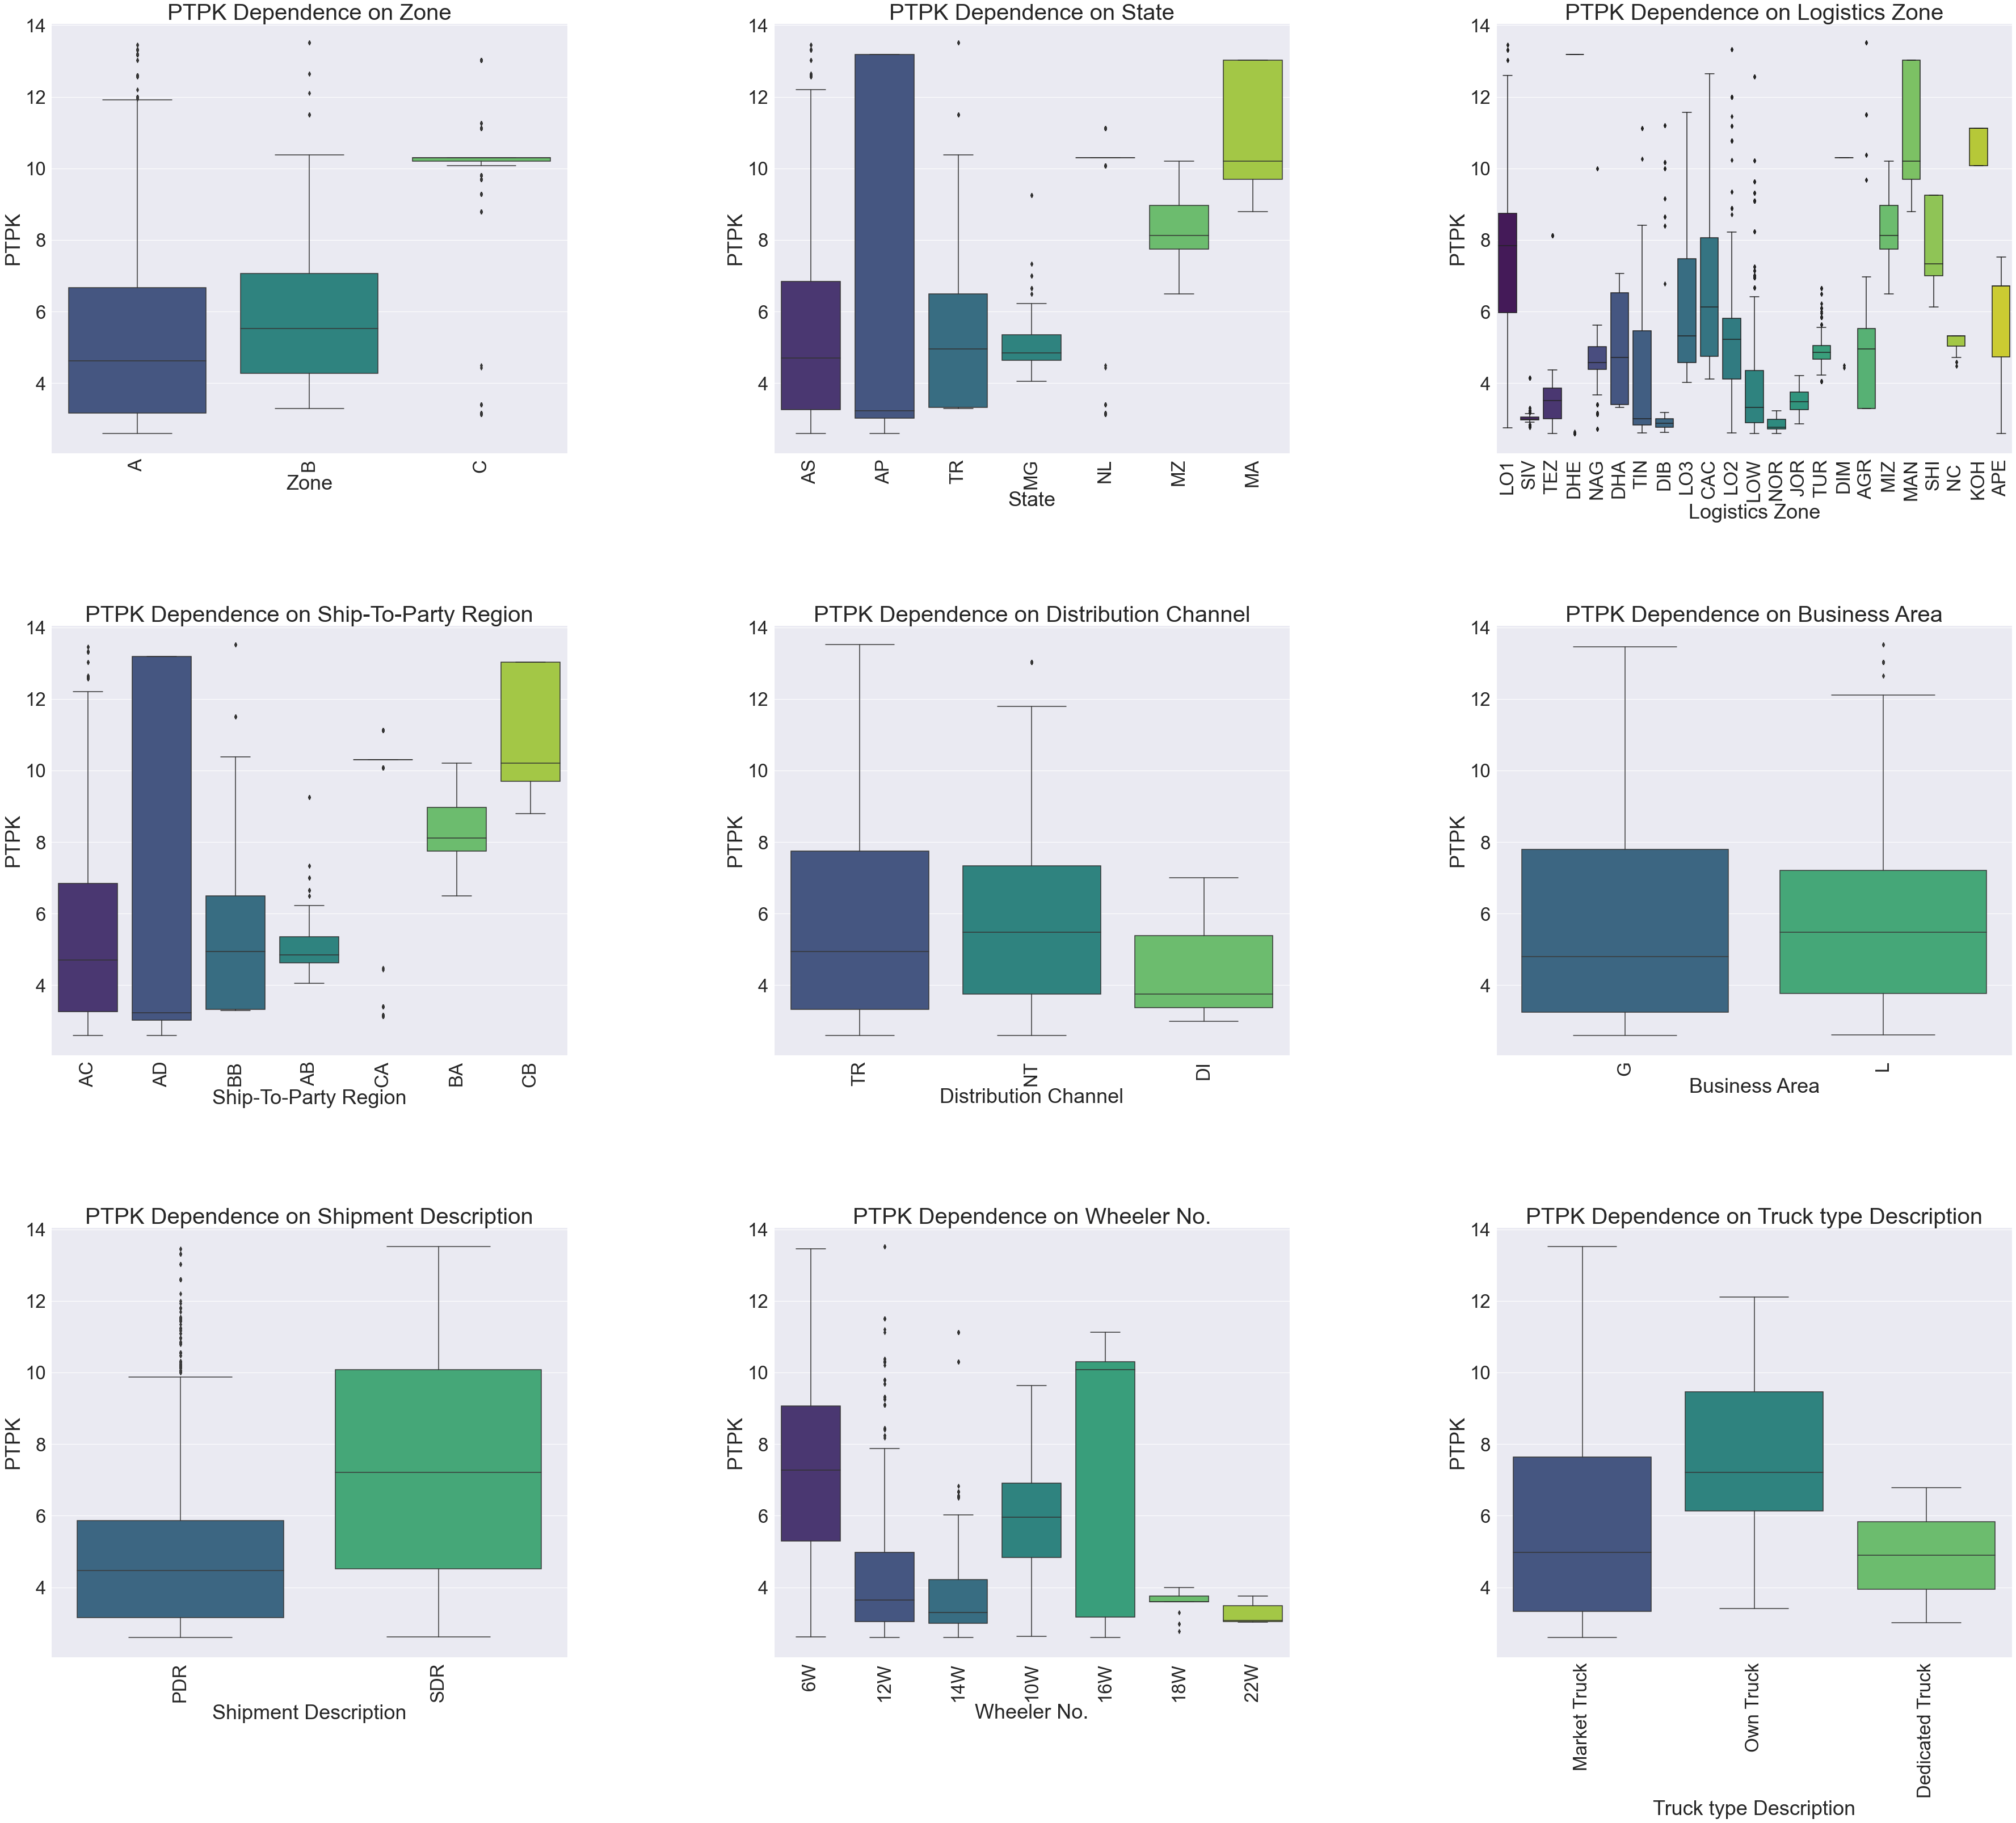

In [15]:
fig = plt.figure(figsize=(60,50))
sns.set(font_scale=3)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
for i in range(len(df_objects.columns)):
    plt.subplot(3,3, i + 1)
    ax=sns.boxplot(x=df_objects.columns[i], y='PTPK', data=df,palette = 'viridis')
    ax.set_title('PTPK Dependence on '+str(df_objects.columns[i]), fontsize=40)
    plt.xticks(rotation=90)
fig.show()

In [16]:
#Get all numeric type columns
num_columns = []
for obj in df.columns:
    if df[obj].dtype != np.object:
        num_columns.append(obj)
print(num_columns)

['Delivery Qty.', 'Route Distance', 'PTPK']


In [17]:
df_nums=df[num_columns]

#### Creating numerical columns to check relationship of PTPK with the numerical columns.

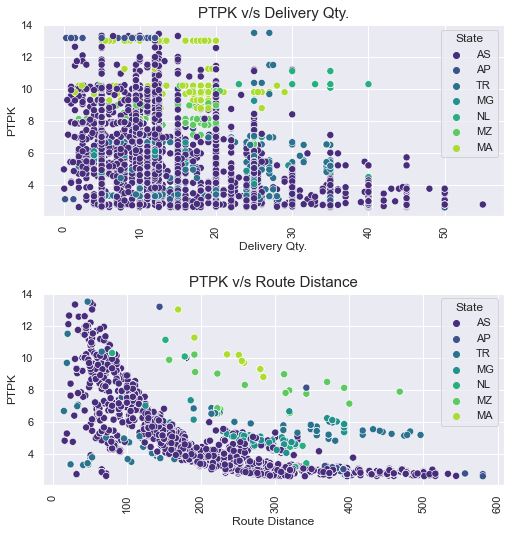

In [18]:
fig = plt.figure(figsize=(8,8))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
sns.set(font_scale=1)
for i in range(len(df_nums.columns)-1):
    plt.subplot(2,1, i + 1)
    ax=sns.scatterplot(x=df_nums.columns[i], y='PTPK',data=df,hue="State",palette = 'viridis', s=50)
    ax.set_title('PTPK v/s '+str(df_nums.columns[i]), fontsize=15)
    plt.xticks(rotation=90)
fig.show()

#### Creation of Heatmap for the numerical features.

<AxesSubplot:>

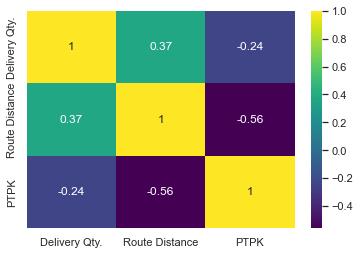

In [19]:
sns.heatmap(df_nums.corr(), annot =True, cmap="viridis")

### Inferences from EDA:

- Zone B & C Show a higher PTPK.
- PTPK is also higher for state MZ.
- The PTPK is higher for SDR.
- PTPK doesn't show a direct dependence on Delivery quantity or Distance individually rather it is determined by a combination of all the factors and other interfering categorical features.


## Model Building

#### Getting dummies for the categorical columns.

In [20]:
df_dummy=pd.get_dummies(df[object_columns], drop_first=True)

In [21]:
df=pd.concat([df, df_dummy], axis=1)

df.shape

(7712, 60)

In [22]:
df = df.drop(object_columns, axis=1) #dropping them as they have already been considered in dummies.

In [23]:
df.shape

(7712, 51)

#### Defining dependent and independent variables.

In [24]:
y=df["PTPK"]
X=df.drop("PTPK", axis=1)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

#### Scaling the features

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Linear Model using Elastic Net

In [30]:
from sklearn.linear_model import ElasticNet

In [31]:
base_elastic_model = ElasticNet()

In [32]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}
folds=4

#### Grid search for best Parameters.

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
# verbose number a personal preference
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=folds,
                          verbose=0)

In [35]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error')

In [36]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.1}

In [37]:
linear_model = ElasticNet(alpha=0.1, l1_ratio= 0.1)

In [38]:
linear_model.fit(X_train,y_train)

ElasticNet(alpha=0.1, l1_ratio=0.1)

In [39]:
y_pred = linear_model.predict(X_test)

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

### Defining a function to perform model fitting and calculating evaluation Metrics

In [41]:
def evaluate(model, name):
    #fit
    model.fit(X_train,y_train)
    #predict
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    #r2score
    r2_score_train = r2_score(y_true= y_train, y_pred= y_pred_train)
    r2_score_test = r2_score(y_true= y_test, y_pred= y_pred_test)
    #MSE
    MSE_train = mean_squared_error(y_train, y_pred_train)
    MSE_test = mean_squared_error(y_test, y_pred_test)
    #MAE
    MAE_train = mean_absolute_error(y_train, y_pred_train)
    MAE_test = mean_absolute_error(y_test, y_pred_test)
    #RMSE
    RMSE_train = np.sqrt(MSE_train)
    RMSE_test = np.sqrt(MSE_test)
    
    print(f"{name}:\n","="*80)
    print("\nFor Train Set:\nR2 score:",r2_score_train.round(4),"\nMSE score:",MSE_train.round(4),"\nMAE score:",MAE_train.round(4),\
     "\nRMSE score:",RMSE_train.round(4),"\n","="*80)
    print("\nFor Test Set:\nR2 score:",r2_score_test.round(4),"\nMSE score:",MSE_test.round(4),"\nMAE score:",MAE_test.round(4),\
      "\nRMSE score:",RMSE_test.round(4),"\n","="*80)

#### Fitting and evaluting Elastic Net Model

In [42]:
evaluate(linear_model,name="Linear Model")

Linear Model:

For Train Set:
R2 score: 0.7533 
MSE score: 1.8029 
MAE score: 0.9538 
RMSE score: 1.3427 

For Test Set:
R2 score: 0.7118 
MSE score: 2.168 
MAE score: 1.0598 
RMSE score: 1.4724 


### Decision Tree Model

In [43]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
dt = DecisionTreeRegressor()

#### Random search for best Parameters.

In [46]:
params = {'max_depth': [2,4,5,10,20],'min_samples_leaf': [5,10,20,50,100]}

In [47]:
dt_grid = RandomizedSearchCV(dt, param_distributions=params,  n_jobs=-1, cv=3, verbose=1, random_state=42)


In [48]:
dt_grid.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 5, 10, 20],
                                        'min_samples_leaf': [5, 10, 20, 50,
                                                             100]},
                   random_state=42, verbose=1)

In [49]:
dt_grid.best_params_

{'min_samples_leaf': 10, 'max_depth': 10}

In [50]:
dt_model = DecisionTreeRegressor(random_state=42, max_depth=10, min_samples_leaf=10)

#### Fitting and evaluting Decision Tree Model

In [51]:
evaluate(dt_model,name="Decision Tree Model")

Decision Tree Model:

For Train Set:
R2 score: 0.9671 
MSE score: 0.2404 
MAE score: 0.2427 
RMSE score: 0.4903 

For Test Set:
R2 score: 0.9673 
MSE score: 0.2463 
MAE score: 0.2519 
RMSE score: 0.4963 


## Random Forest Regression Model

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
rf = RandomForestRegressor(random_state=42)

#### Random search for best Parameters.

In [54]:
params = {'max_depth': [2,5,10,20],'min_samples_leaf': [5,10,20,50,100],'n_estimators': [10,50,100]}

In [55]:
rf_grid = RandomizedSearchCV(rf, param_distributions=params,  n_jobs=-1, cv=3, verbose=1, random_state=42)

In [56]:
rf_grid.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 5, 10, 20],
                                        'min_samples_leaf': [5, 10, 20, 50,
                                                             100],
                                        'n_estimators': [10, 50, 100]},
                   random_state=42, verbose=1)

In [57]:
rf_grid.best_params_

{'n_estimators': 10, 'min_samples_leaf': 5, 'max_depth': 20}

In [58]:
rf_model=RandomForestRegressor(random_state=42, n_estimators=10, min_samples_leaf=5, max_depth=20)

#### Fitting and evaluting Random Forest Model

In [59]:
evaluate(rf_model,name="Random Forest Model")

Random Forest Model:

For Train Set:
R2 score: 0.9851 
MSE score: 0.1089 
MAE score: 0.1382 
RMSE score: 0.3299 

For Test Set:
R2 score: 0.9818 
MSE score: 0.1368 
MAE score: 0.1561 
RMSE score: 0.3699 


### XGBoost

In [60]:
import xgboost as xgb

In [61]:
xgboost = xgb.XGBRegressor(n_jobs = -1) 

#### Random search for best Parameters.

In [62]:
params = {
        'n_estimators' : [10, 50, 100], 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25], 
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }

param_comb = 10

xgb_grid = RandomizedSearchCV(xgboost, param_distributions=params, n_iter=param_comb, n_jobs=-1, cv=2, verbose=3, random_state=42)


In [63]:
xgb_grid.fit(X_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validate

In [64]:
xgb_grid.best_params_

{'subsample': 0.8,
 'n_estimators': 100,
 'min_child_weight': 1,
 'max_depth': 12,
 'learning_rate': 0.1,
 'gamma': 0.1,
 'colsample_bytree': 0.8}

In [65]:
xgb_model=xgb.XGBRegressor(n_jobs = -1, subsample= 0.8,n_estimators=100,min_child_weight=1,
                           max_depth=12, learning_rate=0.1,gamma=0.1, colsample_bytree= 0.8)

#### Fitting and evaluting XGB Model

In [66]:
evaluate(xgb_model, "XGBoost Model")

XGBoost Model:

For Train Set:
R2 score: 0.9961 
MSE score: 0.0283 
MAE score: 0.0908 
RMSE score: 0.1683 

For Test Set:
R2 score: 0.9907 
MSE score: 0.0697 
MAE score: 0.1259 
RMSE score: 0.264 


### Comparing The Test Results for Linear, Decison Tree, Random Forest & XG BOost

In [67]:
Results = pd.DataFrame({"Model":["Elastic Net","Decision Tree","Random Forest","XGBoost"],
                        "R2 SCORE":[0.7118, 0.9673, 0.9818, 0.9907],
                        "MSE":[2.168,0.2463,0.1368,0.0697], 
                        "MAE":[1.0598,0.2519,0.1561,0.1259],
                        "RMSE":[1.4724,0.4963,0.3699,0.264]})

In [68]:
print("The Test Results are:")
Results.set_index("Model")

The Test Results are:


,R2 SCORE,MSE,MAE,RMSE
Model,,,,
Elastic Net,0.7118,2.1680,1.0598,1.4724
Decision Tree,0.9673,0.2463,0.2519,0.4963
Random Forest,0.9818,0.1368,0.1561,0.3699
XGBoost,0.9907,0.0697,0.1259,0.2640


### Thus the  XGBoost Model performs slightly better than Random Forest and hence we wish to use this to answer the business queries.

#### Investigating Feature importances from the model predictions.

In [69]:
feature_df = pd.DataFrame({'Features':X.columns, 'Coefficient':xgb_model.feature_importances_.round(6)})

##Sorting coefficient in descending order of feature importances and resetting index
feature_df = feature_df.sort_values(by='Coefficient', ascending=False)
feature_df.reset_index(drop=True, inplace=True)  
feature_df.head(10)

,Features,Coefficient
0,Ship-To-Party Region_AC,0.2767
1,Zone_C,0.2312
2,State_NL,0.1088
3,Logistics Zone_DHE,0.0825
4,State_AS,0.0726
5,Wheeler No._6W,0.0427
6,State_TR,0.0389
7,Shipment Description_SDR,0.0159
8,Logistics Zone_LO1,0.0128
9,State_MZ,0.0119


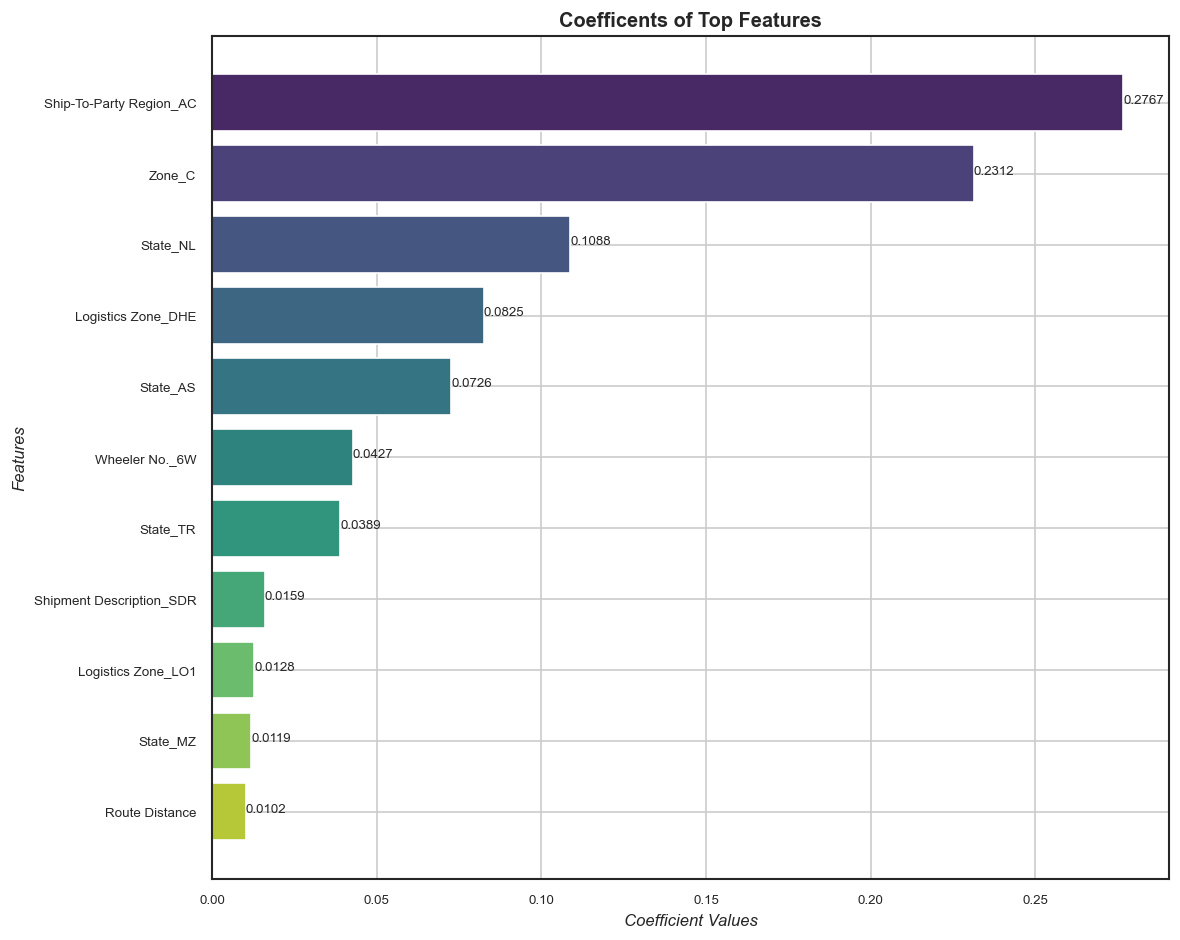

In [73]:
feature_df_top= feature_df.loc[:10] 

sns.set(style='white')
plt.figure(figsize=(10,8), dpi=120)
ax= sns.barplot(y=feature_df_top['Features'], x=feature_df_top['Coefficient'], palette='viridis')

plt.xlabel('Coefficient Values', fontsize= 10, fontstyle='italic')
plt.ylabel('Features' , fontsize= 10, fontstyle='italic')
plt.title('Coefficents of Top Features', fontsize=12,fontweight='bold')

coef= feature_df_top['Coefficient'] 
for index, value in enumerate(coef):
    val=round(value,4)
    plt.text(val, index, str(val), fontsize=8)

plt.grid(True)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.autoscale()
plt.tight_layout()
plt.show()

## Conclusions from Model :

- With the given features the Model can predict the PTPK for a new logistic cluster with an R2 score of 99.07%.

- The Ship to Party Region plays a significant role in determining the PTPK. For zone AC, the PTPK tends to be high and the company needs to revisit the logistic modes for this route inorder to reduce the PTPK.

- The states NL & TR are also an important determinant. This may be attributed to their distances from the plant and hence a mode mix operation has to be worked out for this states.

- The Logistic Zone is also an important determinant of the PTPK. Logistic Zones like DHE & LO1 have a postive coefficient and thus play a significant role in determining the PTPK. The business unit needs to reconsider the operational decision of direct dispatch to these zones. If at all direct dispatch is to be done, then they may think of employing own trucks on these routes.

- The 6 wheeler vehicles imply higher freights and thus higher PTPK. The focus should be towards including higher wheeler vehicles, if not, Other operational options may be thought of by the management.

- The company may incentivize EXW mode for dealers from strategic godowns.

- The Route distance, as obvious, is also an important determinant of the PTPK. Higher distances often incur higher Freight/MT and freight depends on third parties also, the companies do not have direct control over it.

  - However,
    - Rate negotiations need to be carried out bi-weekly.
    - Introduction of E-Tendering processes can be done. 
    - The logistic wing needs to Develop new transporters for the available routes. 
    - Auctions against the routes shall be carried out. 
   with support from the top management.

- The shipments to zone C incur higher PTPK. Area study shall be carried out for this zone. New transporters may be scouted for this zone or the company may think of firing more material by other modes like railway for that region if feasible.

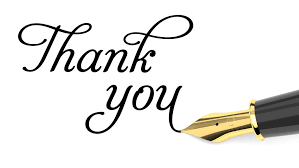